## 0) Initialization

In [1]:
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger,LearningRateScheduler
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split

print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

2022-10-30 11:48:13.136022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 11:48:13.136058: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Versions of key libraries
---
tensorflow:  2.9.1
numpy:       1.20.3
matplotlib:  3.4.3
sklearn:     1.1.2


In [2]:
master_data = pd.read_csv('cleaned_data/merge.csv')
coe_data = pd.read_csv('cleaned_data/coe_new.csv')
coe_data.shape

(483, 21)

In [3]:
#master_data.columns
coe_data.columns

Index(['Date', 'Quota A', 'Quota B', 'Quota C', 'Quota D', 'Quota E',
       'Quota Premium A', 'Quota Premium B', 'Quota Premium C',
       'Quota Premium D', 'Quota Premium E', 'Total Bids Received A',
       'Total Bids Received B', 'Total Bids Received C',
       'Total Bids Received D', 'Total Bids Received E',
       'Number of Successful Bids A', 'Number of Successful Bids B',
       'Number of Successful Bids C', 'Number of Successful Bids D',
       'Number of Successful Bids E'],
      dtype='object')

In [4]:
master_data[['date', 'Quota A','Quota Premium A','Total Bids Received A','Number of Successful Bids A',
       'Resident Households Median Per Pax',
       'Resident Employed Households Average Per Pax',
       'Resident Employed Households Median Per Pax',
       'Resident Households Average', 'Resident Households Median1/',
       'Resident Employed Households Average',
       'Resident Employed Households Median1/',
       'MAS Core Inflation Measure (Index)', 'GDP At Current Market Prices',
       '  Goods Producing Industries', '    Manufacturing', '    Construction',
       '    Utilities', '    Other Goods Industries',
       '  Services Producing Industries', '    Wholesale & Retail Trade',
       '    Transportation & Storage', '    Accommodation & Food Services',
       '    Information & Communications', '    Finance & Insurance',
       '    Real Estate, Professional Services And Administrative & Support Services',
       '    Other Services Industries', '  Ownership Of Dwellings',
       '  Gross Value Added At Basic Prices', '  Add: Taxes On Products',
       'Household Net Worth', '  Assets', '    Financial Assets',
       '      Currency & Deposits', '      Shares & Securities',
       '        Listed Shares', '        Unlisted Shares',
       '        Unit Trusts & Investment Funds', '      Life Insurance',
       '      Central Provident Fund (CPF)', '      Pension Funds',
       '    Residential Property Assets', '      Public Housing',
       '      Private Housing', '  Liabilities', '    Mortgage Loans',
       '      Financial Institutions',
       '      Housing & Development Board (HDB)', '    Personal Loans',
       '      Motor Vehicle', '      Credit/Charge Cards', '      Others',
       'Oil Price', 'Open', 'High', 'Low', 'Vol.', 'Change %',
       'Personal Disposable Income (Million Dollars)',
       'Personal Saving (Million Dollars)', 'Personal Saving Rate (Per Cent)',
       'Rail Length (Kilometres)', '  Mass Rapid Transit (MRT) (Kilometres)',
       '  Light Rail Transit (LRT) (Kilometres)',
       'MRT km Operated (Thousand Train-Kilometres)',
       'LRT km Operated (Thousand Car-Kilometres)',
       'Average Daily Ridership - MRT (Thousand Passenger-Trips)',
       'Average Daily Ridership - LRT (Thousand Passenger-Trips)',
       'Average Daily Ridership - Bus (Thousand Passenger-Trips)',
       'Average Daily Trip - Point-To-Point (P2P) Transport (Taxis And Private Hire Cars) (Thousand Daily-Trips)']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quota A,483.0,1397.927536,706.748763,333.0,687.5,1431.0,1945.5,2858.0
Quota Premium A,483.0,37992.380952,20535.533186,2.0,20053.0,33798.0,53167.0,92100.0
Total Bids Received A,483.0,1950.556936,983.491196,418.0,1067.5,1970.0,2595.5,5927.0
Number of Successful Bids A,483.0,1387.364389,705.400001,324.0,660.5,1417.0,1945.5,2858.0
Resident Households Median Per Pax,468.0,1852.256410,490.545624,1183.0,1399.0,1849.5,2287.0,2652.0
...,...,...,...,...,...,...,...,...
LRT km Operated (Thousand Car-Kilometres),468.0,4739.000000,1669.509061,3303.0,3303.0,3751.5,6620.0,7566.0
Average Daily Ridership - MRT (Thousand Passenger-Trips),468.0,2206.871795,708.991310,1321.0,1527.0,2100.0,2871.0,3384.0
Average Daily Ridership - LRT (Thousand Passenger-Trips),468.0,122.000000,45.976905,69.0,79.0,117.5,153.0,208.0
Average Daily Ridership - Bus (Thousand Passenger-Trips),468.0,3324.192308,475.345421,2779.0,2878.0,3199.0,3891.0,4099.0


In [37]:
coe_data[['Date', 'Quota Premium A']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quota Premium A,483.0,37992.380952,20535.533186,2.0,20053.0,33798.0,53167.0,92100.0


Text(0, 0.5, 'Quota Premium A')

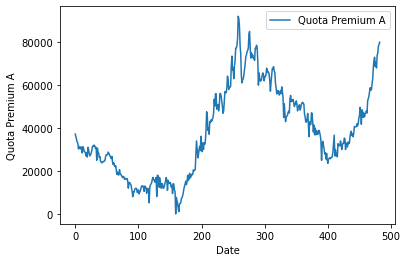

In [43]:
ax = coe_data[['Date', 'Quota Premium A']].plot()
ax.set_xlabel('Date')
ax.set_ylabel('Quota Premium A')

In [6]:
GDP_data = pd.read_csv('cleaned_data/GDP-clean.csv') 
oilprice_data = pd.read_csv('cleaned_data/oil_price_new.csv')

In [44]:
Tp=420 #Until year 2021 Dec
N=468 #coe_data.shape[0], due to covid19

In [45]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

summary = pd.DataFrame(columns=['Method','R^2','MAE','MAPE'])

def generate_summary(method,actual_values,predicted_values,summary):
    Rsquared = r2_score(actual_values, predicted_values)
    MAE = mean_absolute_error(actual_values, predicted_values)
    RMSE = np.sqrt(mean_squared_error(actual_values.values, predicted_values.values))
    MAPE = np.mean(np.abs((actual_values.values - predicted_values.values)/actual_values.values))
    summary = summary.append(pd.DataFrame([[method,Rsquared,MAE,MAPE]],columns=list(summary)))

    print("R^2 : ", Rsquared)
    print("MAE : ", MAE)
    print("RMSE : ", RMSE)
    print("MAPE : ", MAPE)
    return summary

### 1) Data analysiscoe_data

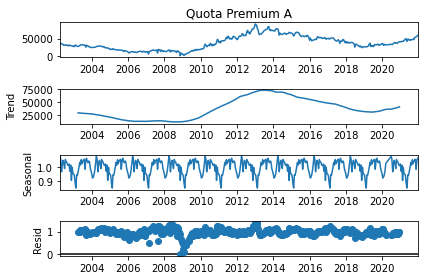

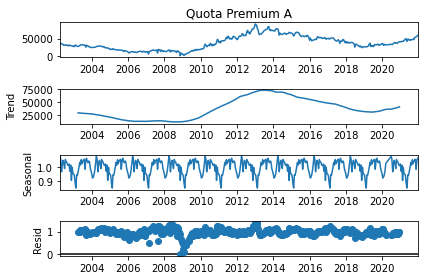

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

X = coe_data.set_index(pd.to_datetime(coe_data['Date']))[:N]

#period=24=1year
decompose_result = seasonal_decompose(X['Quota Premium A'], model='multiplicative',period=48)
decompose_result.plot()

### 2) Reshape with step=4 for SimpleRNN and LSTM

In [10]:
#values = coe_data['Quota A']
values = coe_data['Quota Premium A']

train,test = values[0:Tp], values[Tp:N]

In [11]:
#Reshaping
step = 48
test = np.append(test,np.repeat(test[-1:],step))
train = np.append(train,np.repeat(train[-1:],step))

In [12]:
#convert into dataset matrix
def convertToMatrix(data,step):
    X,Y = [],[]
    for i in range(len(data)-step):
        d = i+step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)


trainX,trainY = convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape

(420, 1, 48)

In [14]:
testX

array([[[34001, 32309, 30000, ..., 55001, 57010, 58801]],

       [[32309, 30000, 32000, ..., 57010, 58801, 58801]],

       [[30000, 32000, 33009, ..., 58801, 58801, 58801]],

       ...,

       [[55001, 57010, 58801, ..., 58801, 58801, 58801]],

       [[57010, 58801, 58801, ..., 58801, 58801, 58801]],

       [[58801, 58801, 58801, ..., 58801, 58801, 58801]]])

### 3) SimpleRNN

In [15]:
modelname   = 'SimpleRNN_COE_CatA'                                                          # Step 2
                                                                                # Step 3
def createModel():
    inputs = Input(shape=(1,step),name='Input')
    
    y = SimpleRNN(32,activation="relu")(inputs)
    #y = SimpleRNN(32)(y) #2nd SimpleRNN layer
    #y = Dense(64,activation='relu')(y)
    y = Dropout(0.2)(y)
    y = Dense(1)(y)
    
    model = Model(inputs=[inputs],outputs=[y])
    
    model.compile(loss="mean_squared_error", #loss='categorical_crossentropy'
                  optimizer=optimizers.RMSprop(lr=0.0001), #optimizer="rmsprop", #
                  metrics=['accuracy'])
    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
#modelGo     = createModel()   # This is used for final testing

model.summary()

2022-10-30 11:48:18.417356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-30 11:48:18.417405: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-30 11:48:18.417431: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yf-VirtualBox): /proc/driver/nvidia/version does not exist
2022-10-30 11:48:18.418259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/yf/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1, 48)]           0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2592      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [16]:
def lrSchedule(epoch):
    lr  = 0.5e-3
    
    # if epoch > 160:
    #    lr  *= 0.5e-3        
    # elif epoch > 140:
    #    lr  *= 1e-3       
    # elif epoch > 120:
    #    lr  *= 1e-2     
    # elif epoch > 80:
    #    lr  *= 1e-1
        
    print('Learning rate: ', lr)
    return lr

LRScheduler     = LearningRateScheduler(lrSchedule)

                                                                                # Step 2
folderpath      = '' #'/content/gdrive/My Drive/iss/prumls/colab/'
filepath        = folderpath + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger,LRScheduler]                           # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print(callbacks_list[2])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+modelname+'.csv')

Callbacks created:

Path to model: SimpleRNN_COE_CatA.hdf5
Path to log:   SimpleRNN_COE_CatA.csv


In [17]:
#Predicting
model.fit(trainX, trainY, epochs=200, batch_size=4, callbacks=callbacks_list)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

predicted = np.concatenate((trainPredict,testPredict),axis=0)

Learning rate:  0.0005
Epoch 1/200
105/105 [==============================] - 1s 3ms/step - loss: 329361472.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 2/200
105/105 [==============================] - 0s 4ms/step - loss: 123005240.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 3/200
105/105 [==============================] - 0s 4ms/step - loss: 99422064.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 4/200
105/105 [==============================] - 0s 4ms/step - loss: 79018552.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 5/200
105/105 [==============================] - 0s 4ms/step - loss: 95260896.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 6/200
105/105 [==============================] - 0s 4ms/step - loss: 88621800.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 7/200
105/105 [==============================] - 0s 4ms/s

In [56]:
model.save('simple-RNN.hdf5')

In [18]:
#Shift back
predicted = np.concatenate((np.empty((step,1)),predicted[:-step]),axis=0)
predicted[:step] = np.NaN

In [19]:
SimpleRNN_predicted = predicted

In [20]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Score: " + str(trainScore))

Score: [10119179.0, 0.0]


In [46]:
predicted = pd.DataFrame(predicted)[0]
summary = generate_summary('SimpleRNN with step='+str(step),values[Tp:N], predicted[Tp:N],summary)

R^2 :  -1.5621491120891946
MAE :  10009.390584309896
RMSE :  12074.975153990415
MAPE :  0.22351410379190415


In [22]:
SimpleRNN_predicted = predicted

In [52]:
SimpleRNN_predicted.to_csv('predicted_SimpleRNN.csv')

### 4) LSTM

In [23]:
modelname   = 'LSTM_COE_CatA'                                                          # Step 2
                                                                                # Step 3
def createModel():
    inputs = Input(shape=(1,step),name='Input')
    
    y = LSTM(32,activation="relu")(inputs)
    #y = Dense(64,activation='relu')(y)
    #y = Dense(8,activation='relu')(y)
    y = Dropout(0.2)(y)
    y = Dense(1)(y)
    
    model = Model(inputs=[inputs],outputs=[y])
    
    model.compile(loss="mean_squared_error", #loss='categorical_crossentropy'
                  optimizer=optimizers.RMSprop(lr=0.0001), #optimizer="rmsprop", #
                  metrics=['accuracy'])
    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
modelGo     = createModel()   # This is used for final testing

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 1, 48)]           0         
                                                                 
 lstm (LSTM)                 (None, 32)                10368     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


/home/yf/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
#Predicting
model.fit(trainX, trainY, epochs=200, batch_size=4, callbacks=callbacks_list)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

predicted = np.concatenate((trainPredict,testPredict),axis=0)

Learning rate:  0.0005
Epoch 1/200
105/105 [==============================] - 2s 5ms/step - loss: 572894720.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 2/200
105/105 [==============================] - 1s 5ms/step - loss: 219508768.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 3/200
105/105 [==============================] - 1s 5ms/step - loss: 196305088.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 4/200
105/105 [==============================] - 0s 5ms/step - loss: 190322352.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 5/200
105/105 [==============================] - 0s 5ms/step - loss: 187987264.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 6/200
105/105 [==============================] - 0s 4ms/step - loss: 169686864.0000 - accuracy: 0.0000e+00 - lr: 5.0000e-04
Learning rate:  0.0005
Epoch 7/200
105/105 [==============================] - 0s 5

In [25]:
#Shift back
predicted = np.concatenate((np.empty((step,1)),predicted[:-step]),axis=0)
predicted[:step] = np.NaN

In [26]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print("Score: " + str(trainScore))

Score: [17373180.0, 0.0]


In [47]:
predicted = pd.DataFrame(predicted)[0]
summary = generate_summary('LSTM',values[Tp:N], predicted[Tp:N],summary)

R^2 :  -1.5621491120891946
MAE :  10009.390584309896
RMSE :  12074.975153990415
MAPE :  0.22351410379190415


In [28]:
LSTM_predicted = predicted

### 5) LSTM + CNN

In [29]:
modelname   = 'LSTM+CNN_COE_CatA+GDP'                                                          # Step 2
                                                                                # Step 3
def createModel():
    #shared1 = Conv2D(32,(16,16),padding='same',activation='relu',name='SharedLyr1')
    #shared2 = Conv2D(48,(8,8),padding='same',activation='relu',name='SharedLyr2')
    #shared3 = Conv2D(64,(4,4),padding='same',activation='relu',name='SharedLyr3')
    
    Lin = Input(shape=(1,step),name='COE_InputData')
    Lx = LSTM(32,activation="relu")(Lin)
    
    #For Right-hand tensor
    Rin = Input(shape=(1,1,10),name='factor_InputData')
    Rx = Conv2D(10,(1,1),padding='same',activation='relu')(Rin)
    #Rx = shared1(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    #Rx = shared2(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    #Rx = shared3(Rx)
    Rx = MaxPooling2D(pool_size=(2,2))(Rx)
    
    #For concated tensor
    x = concatenate([Lx,Rx],axis=-1)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    x = Dense(3,activation='softmax')(x)
    y = Dense(1)(x)
    
    model = Model(inputs=[Lin,Rin],outputs=[y])
    
    model.compile(loss="mean_squared_error", #loss='categorical_crossentropy'
                  optimizer=optimizers.RMSprop(lr=0.0001), #optimizer="rmsprop", #
                  metrics=['accuracy'])
    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
#modelGo     = createModel()   # This is used for final testing

model.summary()

ValueError: Exception encountered when calling layer "max_pooling2d" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,10].

Call arguments received by layer "max_pooling2d" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 10), dtype=float32)

In [ ]:
plot_model(model, 
           #to_file='LSTM+CNN_model.png', 
           show_shapes=True, 
           #show_layer_names=False,
           rankdir='TB')

In [ ]:
model.fit([trDat],                    # Training data
          trLbl,                            # Training label
          validation_data=([tsDat,], tsLbl),   # Validation data and label
          epochs=100,                       # The amount of epochs to be trained
          batch_size=128,                   
          shuffle=True,                     # To shuffle the training data
          callbacks=callbacks_list)         # Callbacks to execute the checkpoints

### 6) Holten-winter

In [30]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [55]:
#Single HWES, Double HWES,Triple HWES
alpha = 1/(2*24) #period=24=1year

HWES1 = SimpleExpSmoothing(X['Quota Premium A'][0:Tp]).fit(smoothing_level=alpha,optimized=False,use_brute=True)
X_HWES1 = HWES1.forecast(step)
HWES1.save('HWES1.pkl')

HWES2_ADD = ExponentialSmoothing(X['Quota Premium A'][0:Tp],trend='add').fit()
X_HWES2_ADD = HWES2_ADD.forecast(step)
HWES2_ADD.save('HWES2_ADD.pkl')

HWES2_MUL = ExponentialSmoothing(X['Quota Premium A'][0:Tp],trend='mul').fit()
X_HWES2_MUL = HWES2_MUL.forecast(step)
HWES2_MUL.save('HWES2_MUL.pkl')

HWES3_MUL = ExponentialSmoothing(X['Quota Premium A'][0:Tp],trend='mul',seasonal='mul',seasonal_periods=24).fit()
X_HWES3_MUL = HWES3_MUL.forecast(step)
HWES3_MUL.save('HWES3_MUL.pkl')

summary = generate_summary('HWES1',X['Quota Premium A'][Tp:N], X_HWES1.loc[Tp:N],summary)
summary = generate_summary('HWES2_ADD',X['Quota Premium A'][Tp:N], X_HWES2_ADD.loc[Tp:N],summary)
summary = generate_summary('HWES2_MUL',X['Quota Premium A'][Tp:N], X_HWES2_MUL.loc[Tp:N],summary)
summary = generate_summary('HWES3_MUL',X['Quota Premium A'][Tp:N], X_HWES3_MUL.loc[Tp:N],summary)

/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provi

R^2 :  -0.03803080897707223
MAE :  6423.998899352056
RMSE :  7685.8015565151345
MAPE :  0.15444462401028522
R^2 :  -3.7087552354439692
MAE :  13258.88604483921
RMSE :  16369.563660869031
MAPE :  0.2920628144615365
R^2 :  -0.8222693964237815
MAE :  7889.794323109098
RMSE :  10183.342152675454
MAPE :  0.17128684601186986
R^2 :  -2.7636789353941418
MAE :  11718.436309341885
RMSE :  14634.919212014845
MAPE :  0.2579467702003663


/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/yf/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [54]:
X_HWES1.to_csv('predicted_HWES1.csv')
X_HWES2_ADD.to_csv('predicted_HWES2_ADD.csv')
X_HWES2_MUL.to_csv('predicted_HWES2_MUL.csv')
X_HWES3_MUL.to_csv('predicted_HWES3_MUL.csv')

### x) Result

In [32]:
def get_label(date):
    '''
    Convert COE bidding exercise date to 'MMM YYYY (<num>)' format
    '''
    month_dict = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
    
    date = pd.to_datetime(date)
    day = date.day
    month = date.month
    year = date.year

    if day <= 14:
        bidding_exercise = '1'
    elif day >= 15:
        bidding_exercise = '2'

    month_string = month_dict[month]
    year_string = str(year)

    label_string = month_string + ' ' + year_string + ' (' + bidding_exercise + ')'
        
    return label_string

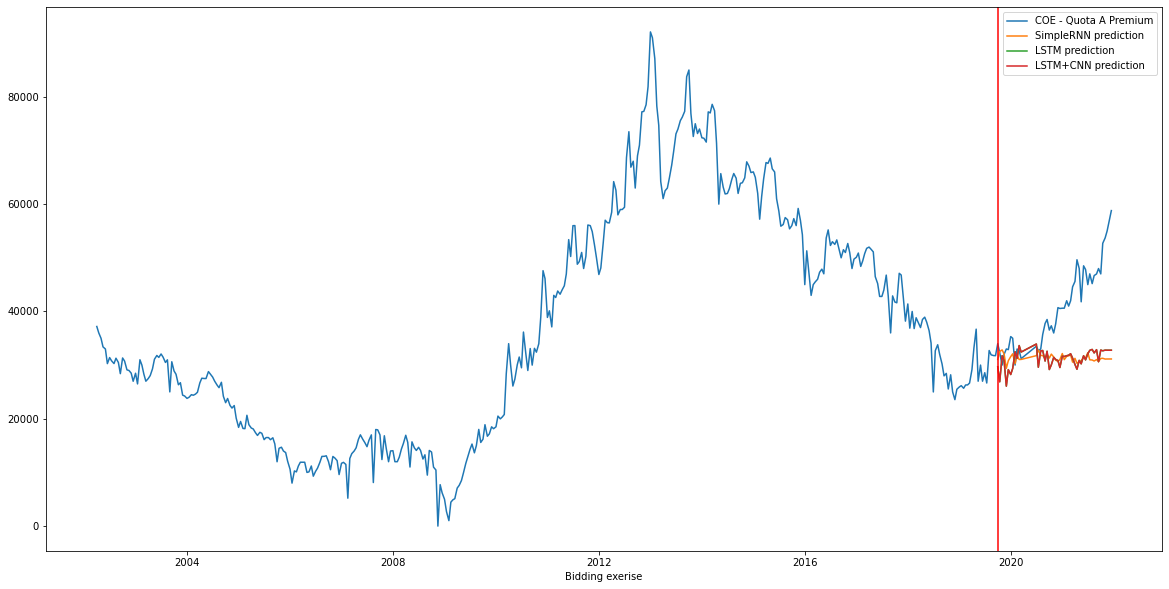

In [33]:
#Plotting result
import datetime
index = pd.to_datetime(coe_data['Date'].iloc[0:N])

matplotlib.pyplot.gcf().set_size_inches(20,10)
plt.plot(index[0:N],values[0:N], label="COE - Quota A Premium")
plt.plot(index[Tp:N],SimpleRNN_predicted[Tp:N], label="SimpleRNN prediction")
plt.plot(index[Tp:N],LSTM_predicted[Tp:N], label="LSTM prediction")
plt.plot(index[Tp:N],LSTM_predicted[Tp:N], label="LSTM+CNN prediction")
plt.axvline(index[Tp], c="r")

plt.savefig("COE - Quota A Premium.png")

plt.xlabel("Bidding exerise")
plt.legend(loc="upper right")

plt.show()

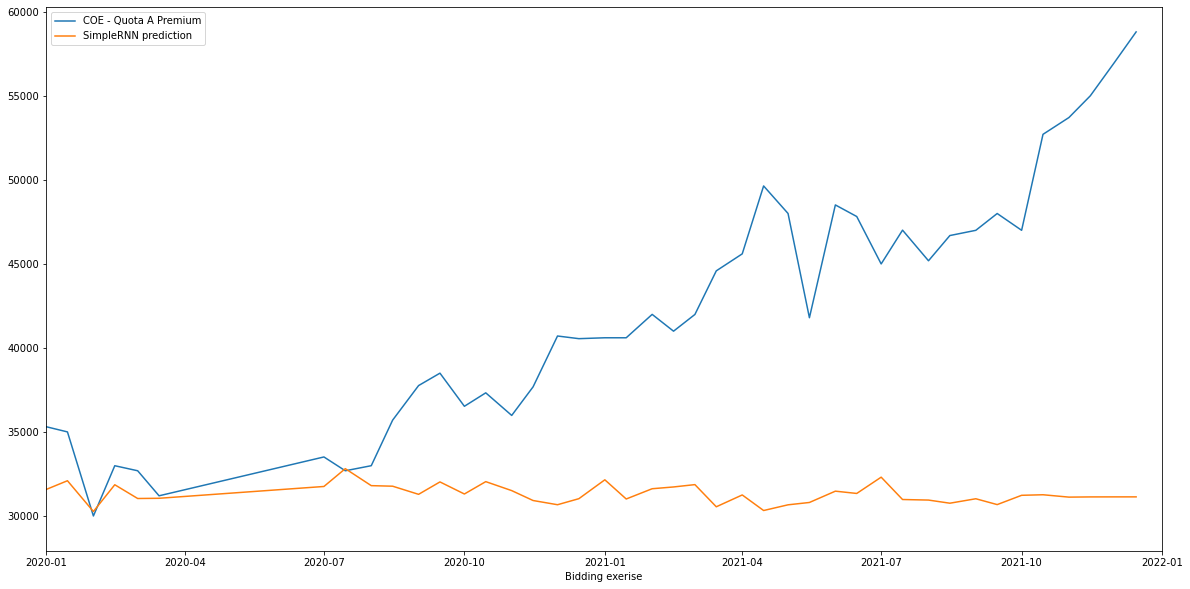

In [34]:
import matplotlib.dates as mdates
#Plotting result - Zoom in
index = pd.to_datetime(coe_data['Date'].iloc[0:N])

matplotlib.pyplot.gcf().set_size_inches(20,10)
plt.plot(index[Tp:N],values[Tp:N], label="COE - Quota A Premium")
plt.plot(index[Tp:N],SimpleRNN_predicted[Tp:N], label="SimpleRNN prediction")
#plt.plot(index[Tp:N],LSTM_predicted[Tp:N], label="LSTM prediction")
#plt.plot(index[Tp:N],LSTM_predicted[Tp:N], label="LSTM+CNN prediction")
plt.axvline(index[Tp], c="r")
plt.gca().set_xbound(datetime.date(2020,1,1),datetime.date(2022,1,1))

plt.xlabel("Bidding exerise")
plt.legend(loc="upper left")

plt.savefig("COE - Quota A Premium - short.png")

plt.show()

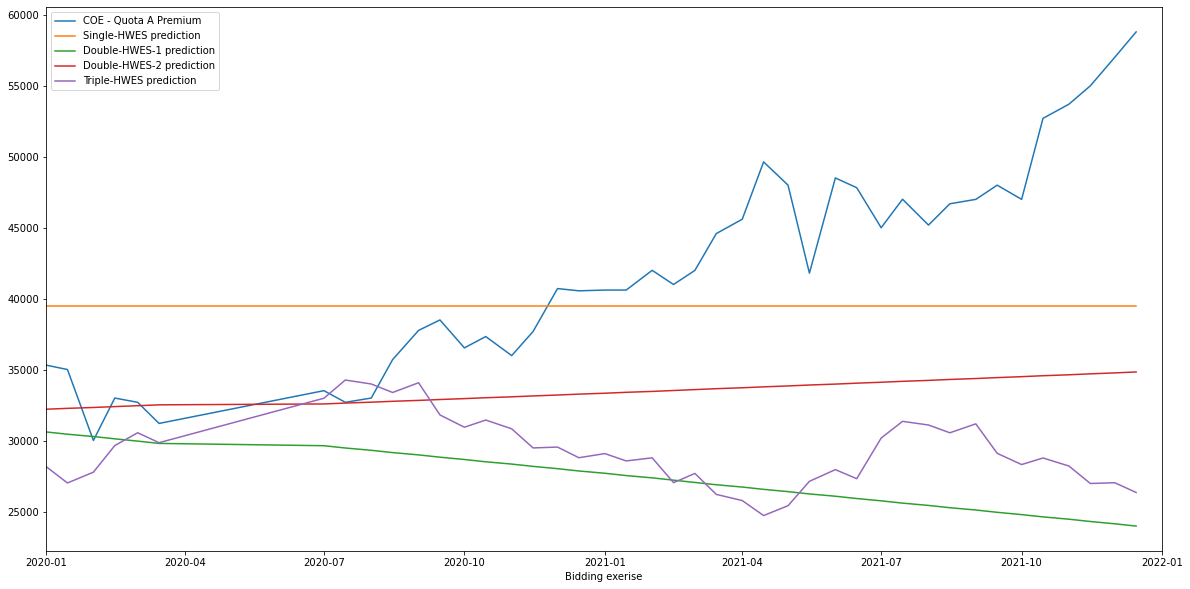

In [35]:
import datetime
index = pd.to_datetime(X['Date'])
matplotlib.pyplot.gcf().set_size_inches(20,10)

plt.plot(index[Tp:N],values[Tp:N], label="COE - Quota A Premium")
plt.plot(index[Tp:N],X_HWES1, label="Single-HWES prediction")
plt.plot(index[Tp:N],X_HWES2_ADD, label="Double-HWES-1 prediction")
plt.plot(index[Tp:N],X_HWES2_MUL, label="Double-HWES-2 prediction")
plt.plot(index[Tp:N],X_HWES3_MUL, label="Triple-HWES prediction")
#plt.axvline(index[Tp], c="r")
plt.gca().set_xbound(datetime.date(2020,1,1),datetime.date(2022,1,1))

plt.xlabel("Bidding exerise")
plt.legend(loc="upper left")

plt.show()

In [49]:
summary.loc[:,'MAPE'] = summary['MAPE'].map('{:.2%}'.format)
summary

,Method,R^2,MAE,MAPE
0,SimpleRNN with step=48,-1.562149,10009.390584,22.35%
0,LSTM,-1.562149,10009.390584,22.35%
0,HWES1,-0.038031,6423.998899,15.44%
0,HWES2_ADD,-3.708755,13258.886045,29.21%
0,HWES2_MUL,-0.822269,7889.794323,17.13%
0,HWES3_MUL,-2.763679,11718.436309,25.79%
